# *Data Cleaning*

## Delete all the unimportant files from the directories downloaded through the Metropolitan Police Dataset

In [ ]:
# Delete all the unimportant files from the directories
# downloaded through the Metropolitan Police Dataset
import os

directory = "D:\Old_Courses\Masters Modules\Individual Project\Program\data"

# Traverse the main directory
for root, dirs, files in os.walk(directory):
    # Iterate over the files in each subdirectory
    for file in files:
        # Check if the file name contains the desired string
        if "metropolitan-stop-and-search" not in file:
            # Create the full path to the file
            file_path = os.path.join(root, file)
            # Delete the file
            os.remove(file_path)
            print(f"Deleted: {file_path}")


## Combine all the data together

In [15]:
# Combine all the data together

import os
import pandas as pd

directory = "D:\Old_Courses\Masters Modules\Individual Project\Program\data"
output_file = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Traverse the main directory
for root, dirs, files in os.walk(directory):
    # Iterate over the files in each subdirectory
    for file in files:
        # Check if the file is a CSV file
        if file.endswith(".csv"):
            # Create the full path to the file
            file_path = os.path.join(root, file)
            # Read the CSV file into a DataFrame
            data = pd.read_csv(file_path)
            # Append the data to the combined DataFrame
            combined_data = combined_data.append(data, ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv(output_file, index=False)
print(f"Combined data saved to: {output_file}")

Combined data saved to: D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv


# Add Borough using Ball Tree and remove NaN entries from the combined data

In [ ]:
pip install folium

In [10]:
pip install geopandas

  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree

# Load the combined_data.csv file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv")

# Load the London_postcodes.csv file
london_postcodes = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\London_postcodes.csv")

# Drop rows with missing values from both DataFrames
combined_data = combined_data.dropna(subset=["Longitude", "Latitude"])
london_postcodes = london_postcodes.dropna(subset=["Longitude", "Latitude", "District"])

# Select the relevant columns for nearest neighbor search
combined_coords = combined_data[["Longitude", "Latitude"]].values
london_coords = london_postcodes[["Longitude", "Latitude"]].values
london_districts = london_postcodes["District"].values

# Perform nearest neighbor search using BallTree
tree = BallTree(london_coords, leaf_size=2)
distances, indices = tree.query(combined_coords, k=1)

# Retrieve the corresponding districts (boroughs) for each nearest neighbor
nearest_districts = london_districts[indices.ravel()]

# Assign the borough information to the combined_data DataFrame
combined_data["Borough"] = nearest_districts

# Save the updated DataFrame to a new CSV file
combined_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_with_borough.csv", index=False)

print(combined_data.head())

C:\Users\Konstantinos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                        Type                       Date  \
0              Person search  2018-01-01T00:05:00+00:00   
1              Person search  2018-01-01T00:15:00+00:00   
2  Person and Vehicle search  2018-01-01T00:16:00+00:00   
3  Person and Vehicle search  2018-01-01T00:17:00+00:00   
4              Person search  2018-01-01T00:20:00+00:00   

   Part of a policing operation  Policing operation   Latitude  Longitude  \
0                         False                 NaN  51.425491  -0.220473   
1                         False                 NaN  51.459996  -0.116896   
2                         False                 NaN  51.542049  -0.380529   
3                         False                 NaN  51.613286  -0.065711   
4                         False                 NaN  51.461004  -0.115876   

  Gender Age range                             Self-defined ethnicity  \
0   Male     18-24                 White - Any other White background   
1   Male   over 34                 W

## Combine only the data from 2018-2019 (Before the Covide-19 Pandemic)

In [10]:
import pandas as pd

# Read the "combined_data.csv" file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_with_borough.csv")

# Filter the data based on the "Date" column
prepandemic_data = combined_data[combined_data["Date"].str.contains("2018|2019")]

# Save the filtered data to "prepandemic_data.csv"
prepandemic_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_data.csv", index=False)

print(prepandemic_data.head())

                        Type                       Date  \
0              Person search  2018-01-01T00:05:00+00:00   
1              Person search  2018-01-01T00:15:00+00:00   
2  Person and Vehicle search  2018-01-01T00:16:00+00:00   
3  Person and Vehicle search  2018-01-01T00:17:00+00:00   
4              Person search  2018-01-01T00:20:00+00:00   

   Part of a policing operation  Policing operation   Latitude  Longitude  \
0                         False                 NaN  51.425491  -0.220473   
1                         False                 NaN  51.459996  -0.116896   
2                         False                 NaN  51.542049  -0.380529   
3                         False                 NaN  51.613286  -0.065711   
4                         False                 NaN  51.461004  -0.115876   

  Gender Age range                             Self-defined ethnicity  \
0   Male     18-24                 White - Any other White background   
1   Male   over 34                 W

## Combine only the data  2020-2021 (During the Covid-19 Pandemic)

In [9]:
import pandas as pd

# Read the "combined_data.csv" file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_with_borough.csv")

# Filter the data based on the "Date" column
pandemic_data = combined_data[combined_data["Date"].str.contains("2020|2021")]

# Save the filtered data to "prepandemic_data.csv"
pandemic_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_data.csv", index=False)

print(pandemic_data.head())

                             Type                       Date  \
356983              Person search  2020-01-01T00:00:00+00:00   
356984              Person search  2020-01-01T00:01:00+00:00   
356985              Person search  2020-01-01T00:07:00+00:00   
356986  Person and Vehicle search  2020-01-01T00:10:00+00:00   
356987              Person search  2020-01-01T00:10:00+00:00   

        Part of a policing operation  Policing operation   Latitude  \
356983                         False                 NaN  51.546371   
356984                         False                 NaN  51.509232   
356985                         False                 NaN  51.588914   
356986                         False                 NaN  51.544707   
356987                         False                 NaN  51.544707   

        Longitude Gender Age range  \
356983  -0.076007   Male     25-34   
356984  -0.117576   Male     18-24   
356985  -0.027220   Male       NaN   
356986  -0.144062   Male     25-34  

## Combine only the data from 2022-2023 (During the Covid-19 Pandemic)

In [11]:
import pandas as pd

# Read the "combined_data.csv" file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_with_borough.csv")

# Filter the data based on the "Date" column
pandemic_data = combined_data[combined_data["Date"].str.contains("2022|2023")]

# Save the filtered data to "prepandemic_data.csv"
pandemic_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_data.csv", index=False)

print(pandemic_data.head())

                             Type                       Date  \
841133  Person and Vehicle search  2022-01-01T00:00:00+00:00   
841134              Person search  2022-01-01T00:00:00+00:00   
841135  Person and Vehicle search  2022-01-01T00:00:00+00:00   
841136              Person search  2022-01-01T00:00:00+00:00   
841137              Person search  2022-01-01T00:00:00+00:00   

        Part of a policing operation  Policing operation   Latitude  \
841133                         False                 NaN  51.521306   
841134                         False                 NaN  51.374152   
841135                         False                 NaN  51.521306   
841136                         False                 NaN  51.471001   
841137                         False                 NaN  51.473023   

        Longitude  Gender Age range  \
841133  -0.153057    Male     18-24   
841134  -0.105219  Female   over 34   
841135  -0.153057    Male     18-24   
841136   0.055595    Male     25

# *Data Analysis*

## Count the overall sample throughout all the years

In [6]:
# Count the overall sample throughout all the years

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Total entries: {total_entries}")

Total entries: 1140779


## Count only the pre-pandemic sample throughout 2018-2019

In [7]:
# Count the pre-pandemimc sample throughout 2018-2019

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Pre-pandemic entries: {total_entries}")

Pre-pandemic entries: 415224


## Count the pandemic sample throughout 2020-2021

In [10]:
# Count the pandemimc sample throughout 2020-2021

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Pandemic entries: {total_entries}")

Pandemic entries: 542019


## Count the post-pandemic sample throughout 2022-2023

In [16]:
# Count the post-pandemimc sample throughout 2022-2023

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Post-pandemic entries: {total_entries}")

Post-pandemic entries: 183536


## Print the Different Ethnic Categories defined by the Police

In [21]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Self-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Self-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)


Different values in the 'Self-defined ethnicity' column:
White - Any other White background
Black/African/Caribbean/Black British - Caribbean
Black/African/Caribbean/Black British - African
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background
Asian/Asian British - Any other Asian background
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background
Other ethnic group - Not stated
Other ethnic group - Any other ethnic group
White - English/Welsh/Scottish/Northern Irish/British
Mixed/Multiple ethnic groups - White and Black Caribbean
Asian/Asian British - Bangladeshi
Asian/Asian British - Pakistani
nan
Asian/Asian British - Indian
Mixed/Multiple ethnic groups - White and Black African
White - Irish
Asian/Asian British - Chinese
Mixed/Multiple ethnic groups - White and Asian


## Count the overall number of each ethnicity in the whole sample

Total entries with 'White British' ethnicity: 225822
Total entries with 'White Other' ethnicity: 129083
Total entries with 'Black' ethnicity: 309471
Total entries with 'South Asian' ethnicity: 75389
Total entries with 'East Asian' ethnicity: 77522
Total entries with 'Other' ethnicity: 2826


Text(0, 0.5, 'Count')

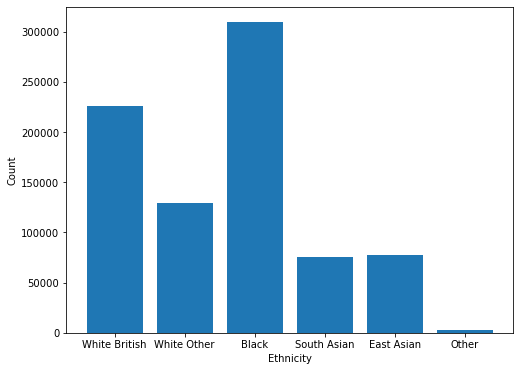

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Self-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Europeans
white_uk_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White - English/Welsh/Scottish/Northern Irish/British")]
white_irish_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White - Irish")]
white_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White - Any other White background")]

# Blacks
black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Black")]

# South-Asians
indian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Indian")]
pakistani_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Pakistani")]
bangladeshi_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Bangladeshi")]

# East-Asians
chinese_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Chinese")]
other_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Asian/Asian British - Any other Asian background")]

# Mixed and unknown
mixed_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed/Multiple ethnic groups - White and Asian")]
other_ethnic_group = combined_data[combined_data["Self-defined ethnicity"].str.contains("Other ethnic group")]


# Count the number of entries
total_white_british_entries = white_uk_filtered_data.shape[0] + white_irish_filtered_data.shape[0]
total_white_other_entries = white_other_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_south_asian_entries = indian_filtered_data.shape[0] + pakistani_filtered_data.shape[0] + bangladeshi_filtered_data.shape[0]
total_east_asian_entries = chinese_filtered_data.shape[0] + other_asian_filtered_data.shape[0]
total_other_entries = mixed_asian_filtered_data.shape[0]

# Print the total counts
print(f"Total entries with 'White British' ethnicity: {total_white_british_entries}")
print(f"Total entries with 'White Other' ethnicity: {total_white_other_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'South Asian' ethnicity: {total_south_asian_entries}")
print(f"Total entries with 'East Asian' ethnicity: {total_east_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')


## Officers' ethnicities

Different values in the 'Officer-defined ethnicity' column:
White
Black
Other
Asian
nan


Total entries with 'White' ethnicity: 437550
Total entries with 'Black' ethnicity: 434535
Total entries with 'Asian' ethnicity: 193434
Total entries with 'Other' ethnicity: 51204


Text(0, 0.5, 'Count')

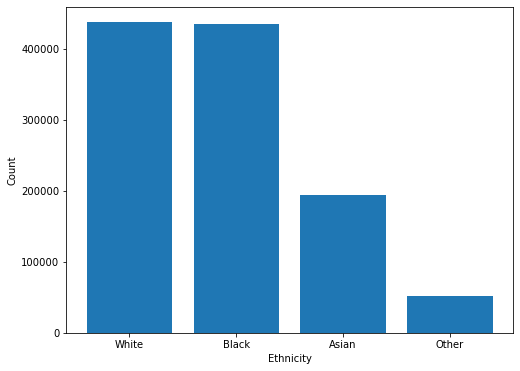

In [44]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Officer-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Officer-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)
    
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Officer-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Whites
white_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("White")]
# Blacks
black_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Black")]
# Asians
asian_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Asian")]
# Others
other_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_entries = white_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_asian_entries = asian_filtered_data.shape[0]
total_other_entries = other_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'White' ethnicity: {total_white_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'Asian' ethnicity: {total_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White', 'Black', 'Asian', 'Other']
counts = [total_white_entries, total_black_entries, total_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')